In [17]:
import pickle
import torch
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [28]:
figsize = (10,5)
logs_dir = "Project Data/Temp data"

In [5]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [7]:
def load_train_logs(file_name, device_type):
    """Un-pickle logs pickle object and return result in dictionary
    """
    if device_type == 'cpu':
        with open(file_name, "rb") as f:
            logs = CPU_Unpickler(f).load()
    else:
        with open(file_name, "rb") as f:
            logs = pickle.load(f)
    return logs

In [11]:
def plot_losses(train_logs):
    assert 'losses' in train_logs.keys()
    ## if loss is of the form: tensor(value)
    train_loss = [i.item() for i in train_logs['losses']]
    plt.figure()
    plt.plot(train_loss)
    plt.show()
    

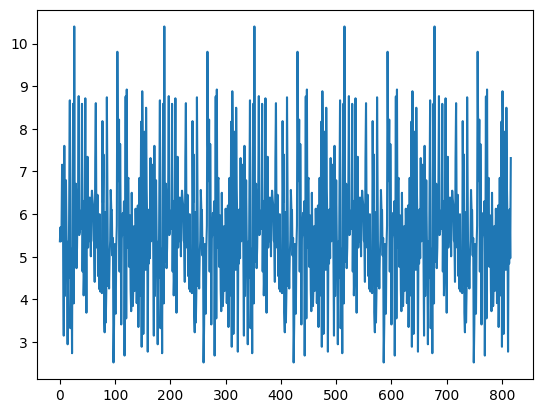

In [12]:
train_logs_1_filename = f"{logs_dir}/train_1.pickle"
train_logs_1 = load_train_logs(file_name=train_logs_1_filename, device_type=device.type)
plot_losses(train_logs_1) 

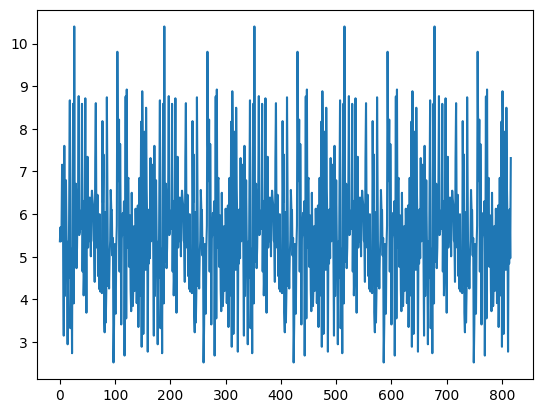

In [15]:
train_logs_2_filename = f"{logs_dir}/train_2.pickle"
train_logs_2 = load_train_logs(file_name=train_logs_1_filename, device_type=device.type)
plot_losses(train_logs_2) 

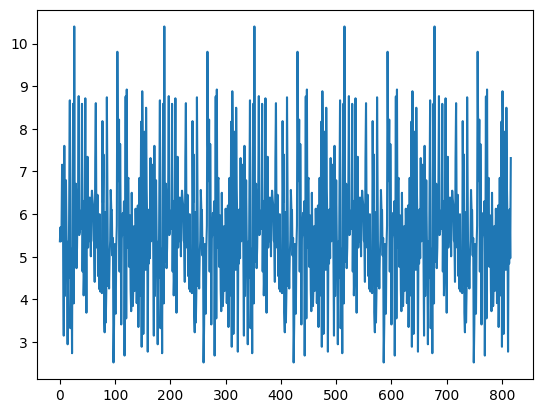

In [16]:
train_logs_3_filename = f"{logs_dir}/train_3.pickle"
train_logs_3 = load_train_logs(file_name=train_logs_1_filename, device_type=device.type)
plot_losses(train_logs_3) 

## Plot logs from csv file

In [44]:
def plot_train_metric(df, column_name):
    time_ = df['Timestamp (s)'].values.tolist()
    y_vals = df[column_name].values.tolist()
    plt.figure(figsize=figsize)
    plt.plot(time_, y_vals)
    plt.title(f'{column_name} vs time')
    plt.xlabel('Time (s)')
    plt.ylabel(f'{column_name}')
    plt.show()

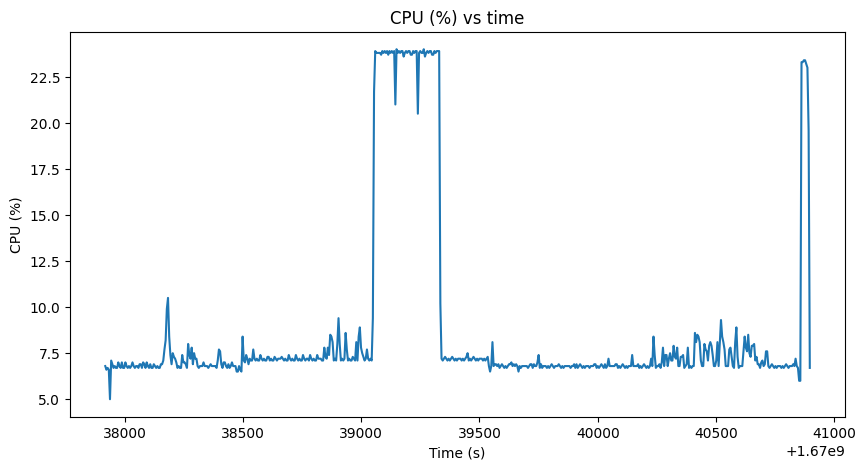

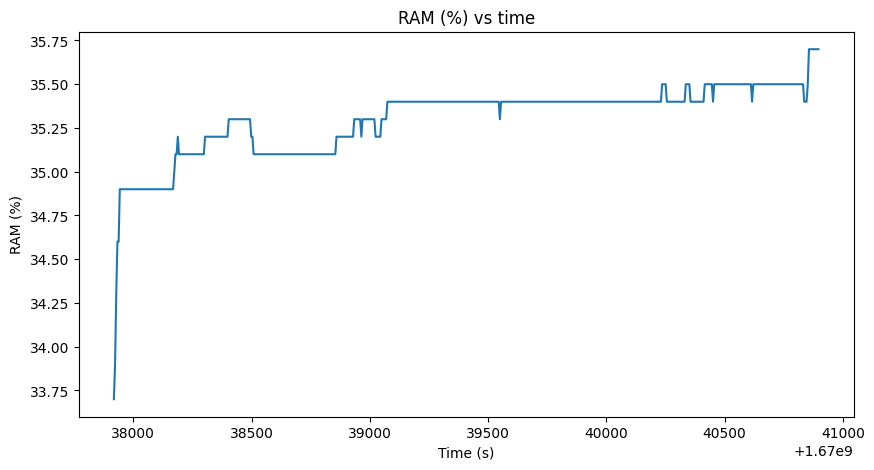

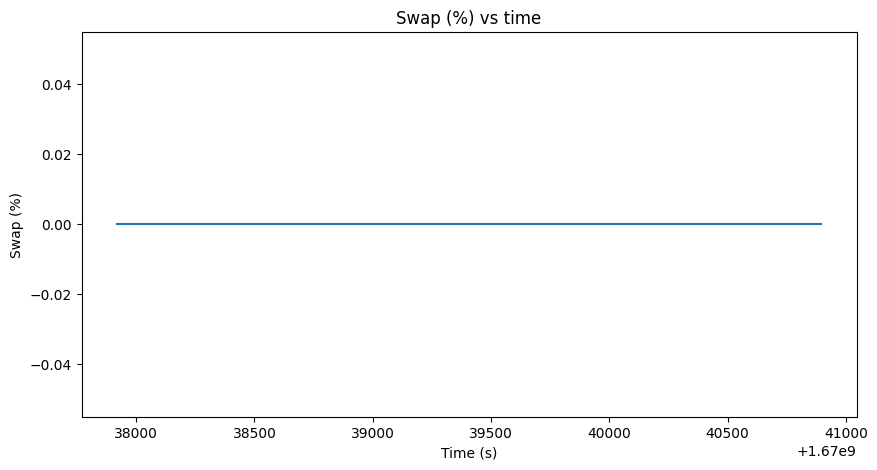

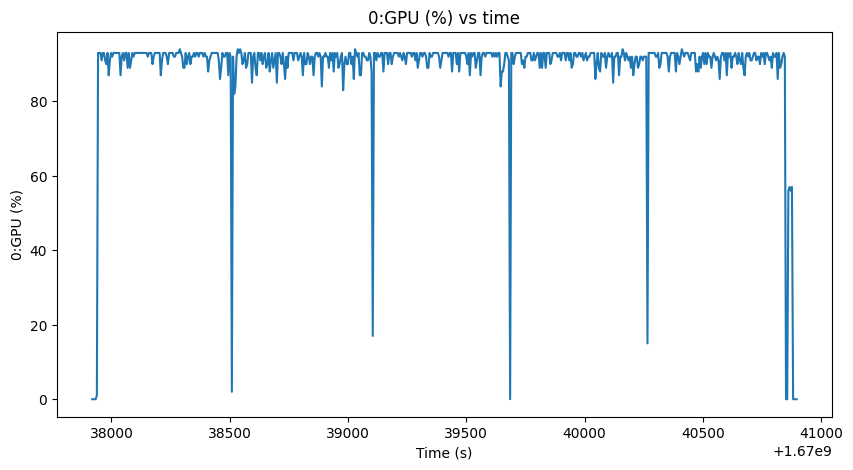

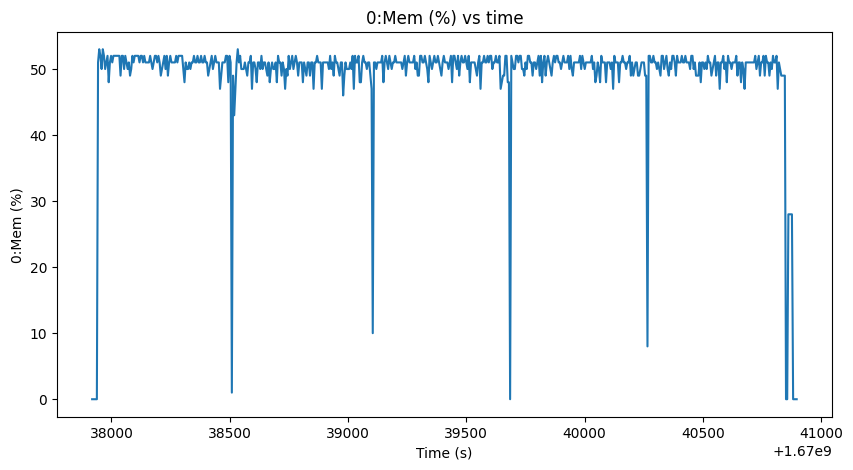

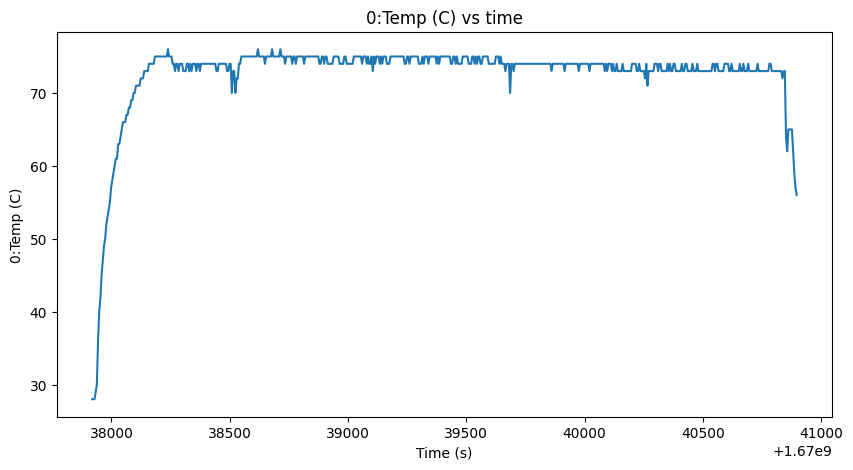

In [45]:
df = pd.read_csv(f"{logs_dir}/log_compute.csv")
plot_train_metric(df, column_name='CPU (%)'),
plot_train_metric(df, column_name='RAM (%)'),
plot_train_metric(df, column_name='Swap (%)'),
plot_train_metric(df, column_name='0:GPU (%)'),
plot_train_metric(df, column_name='0:Mem (%)'),
plot_train_metric(df, column_name='0:Temp (C)')

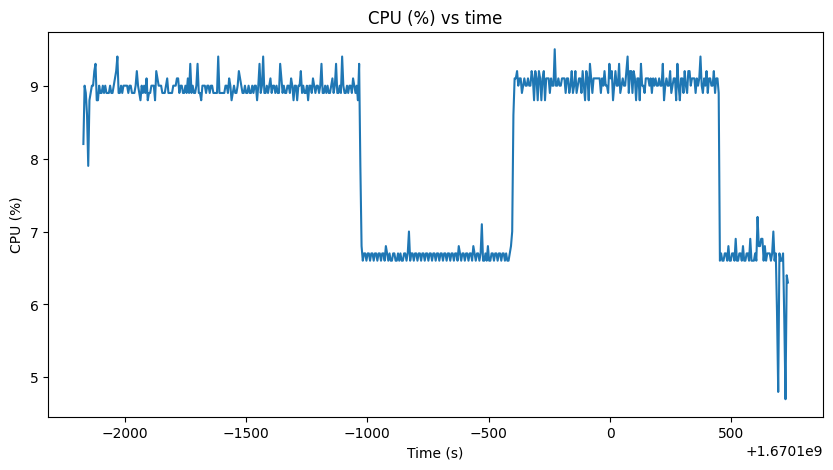

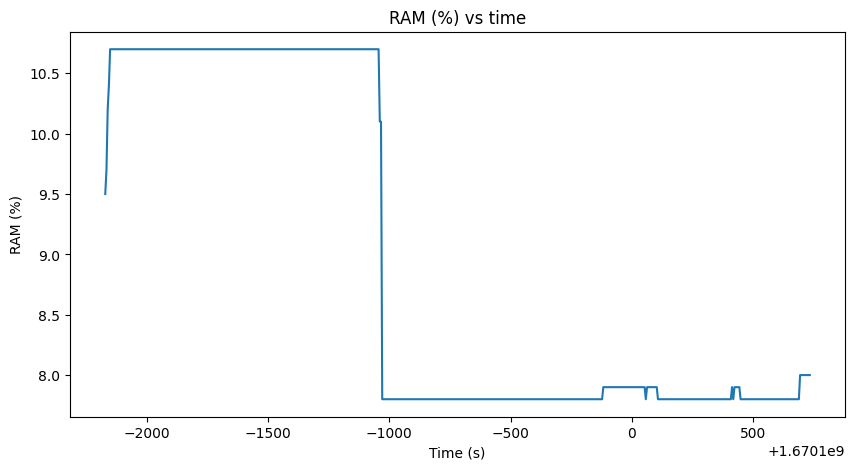

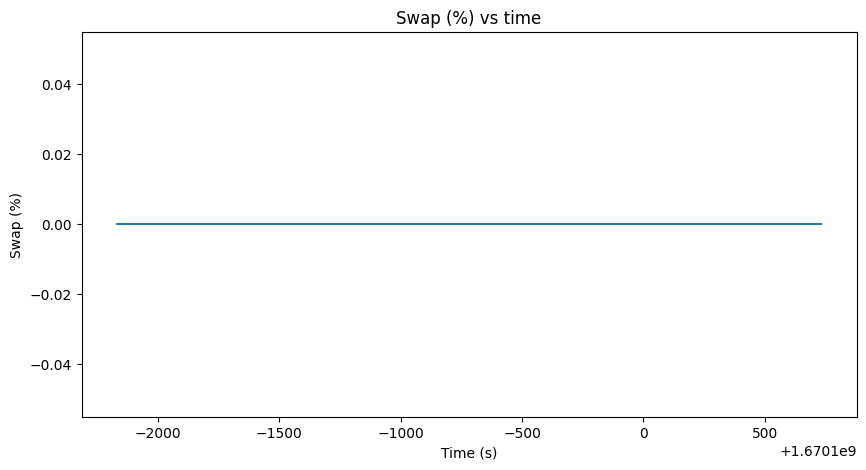

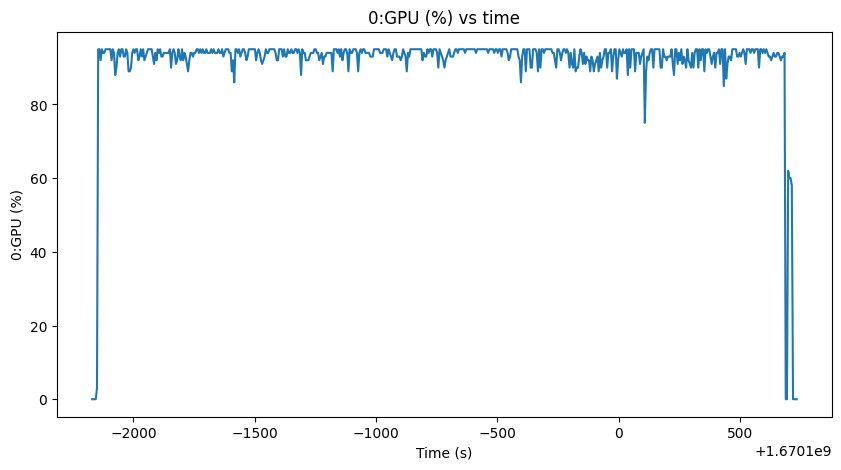

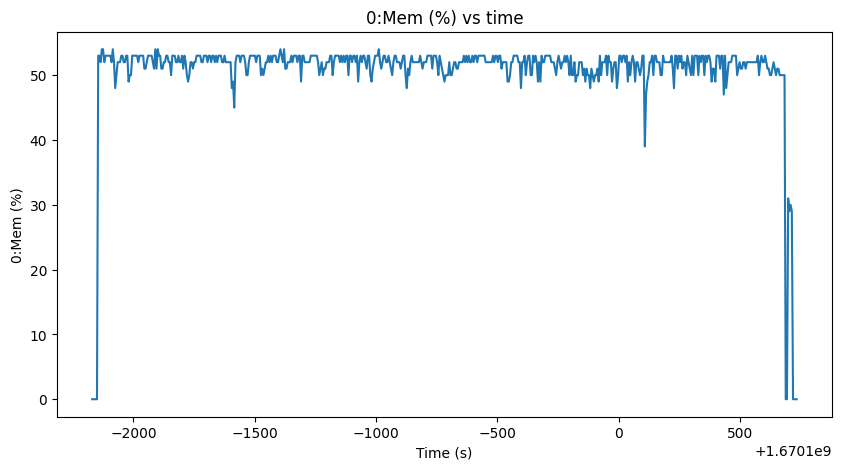

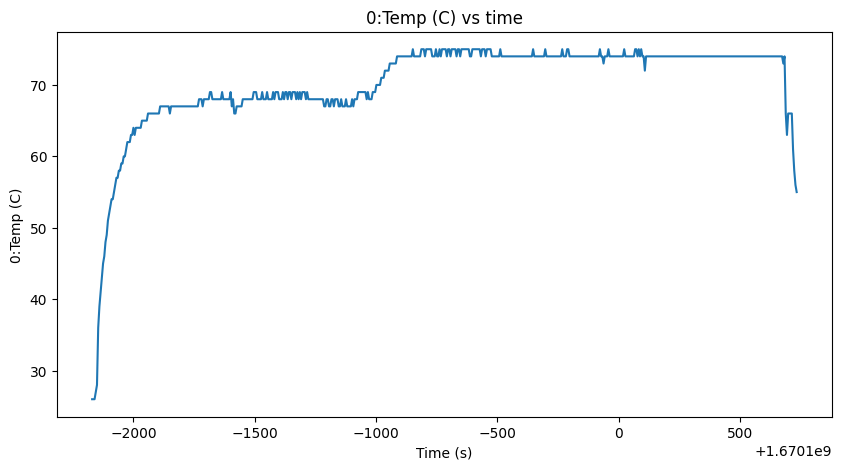

In [48]:
df2 = pd.read_csv(f"{logs_dir}/log_compute_2.csv")
plot_train_metric(df2, column_name='CPU (%)'),
plot_train_metric(df2, column_name='RAM (%)'),
plot_train_metric(df2, column_name='Swap (%)'),
plot_train_metric(df2, column_name='0:GPU (%)'),
plot_train_metric(df2, column_name='0:Mem (%)'),
plot_train_metric(df2, column_name='0:Temp (C)')

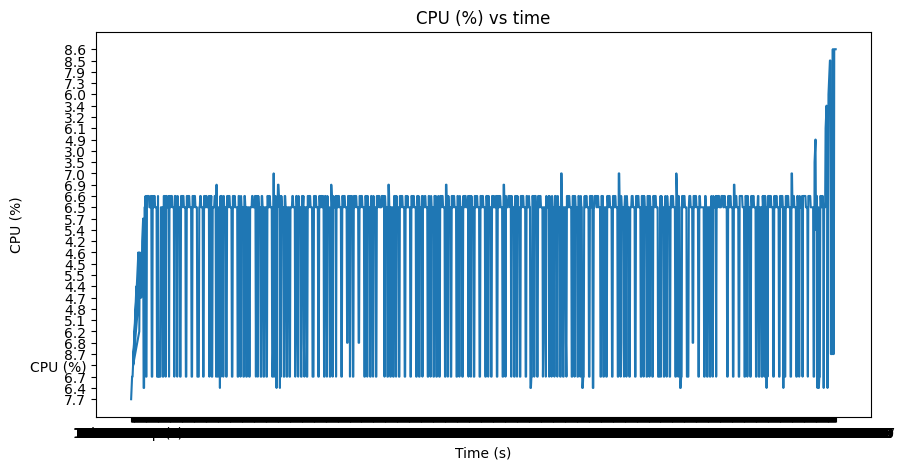

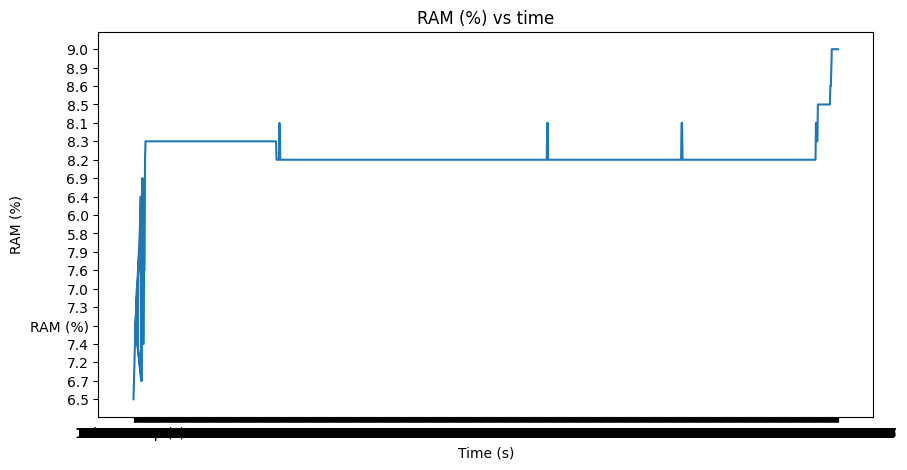

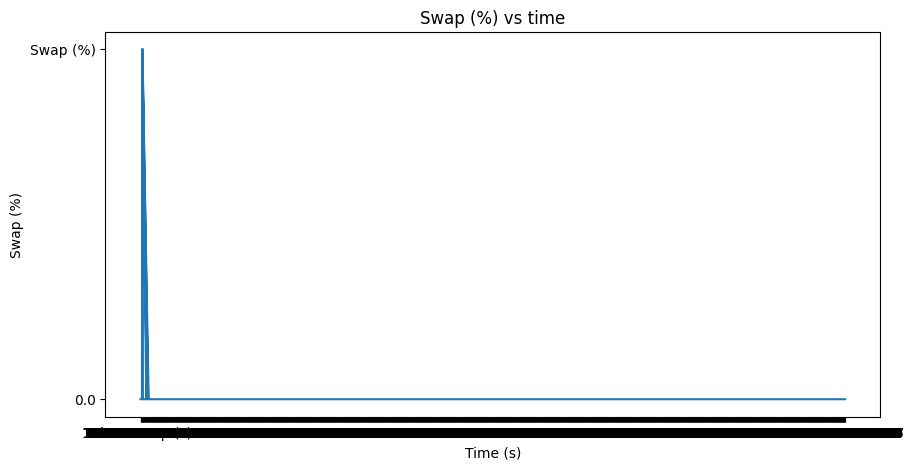

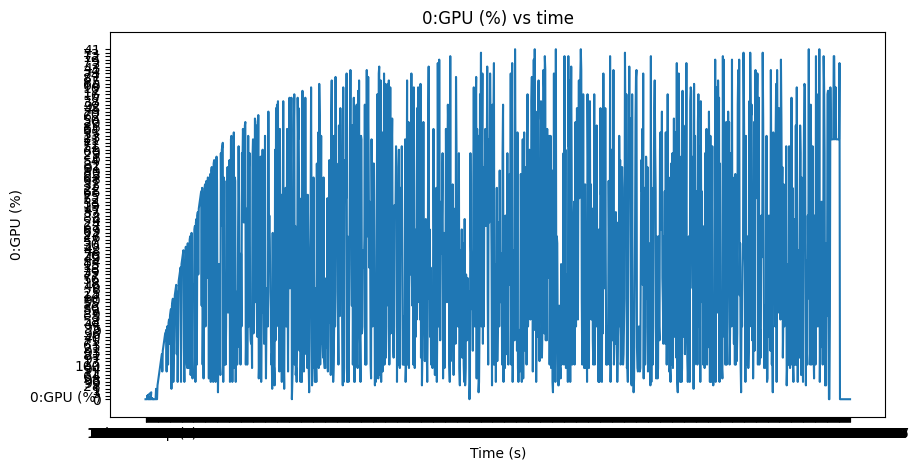

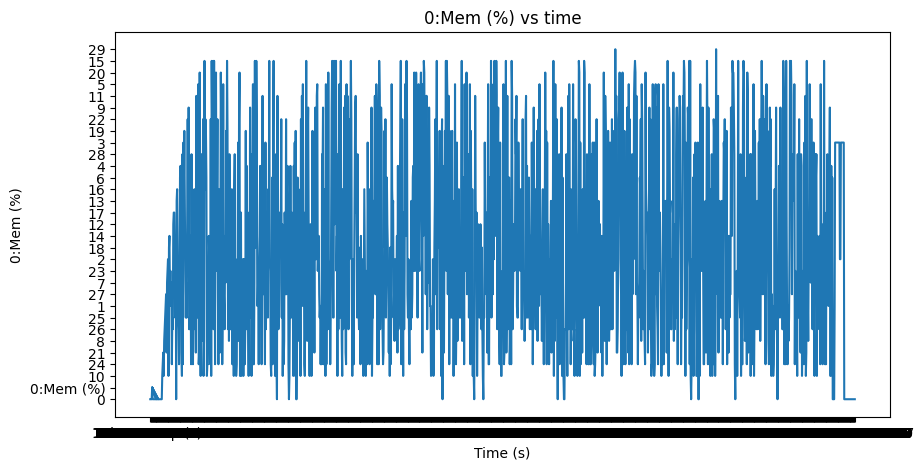

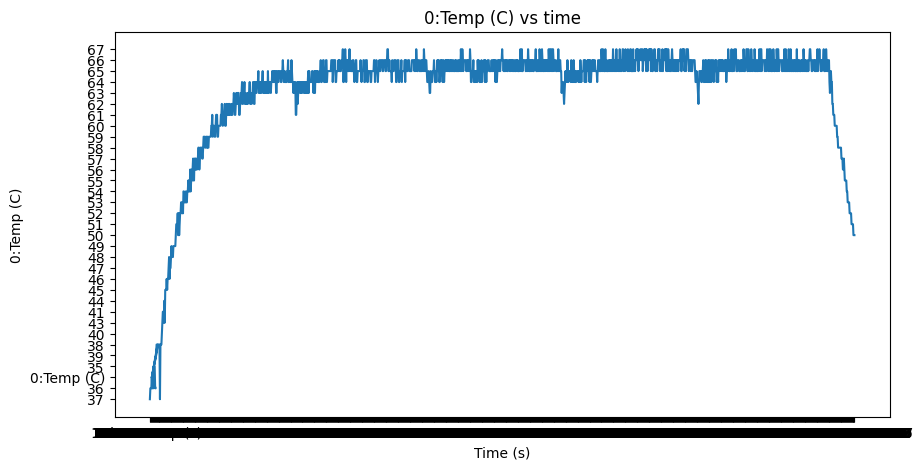

In [50]:
df3 = pd.read_csv(f"{logs_dir}/log_compute_3.csv")
plot_train_metric(df3, column_name='CPU (%)'),
plot_train_metric(df3, column_name='RAM (%)'),
plot_train_metric(df3, column_name='Swap (%)'),
plot_train_metric(df3, column_name='0:GPU (%)'),
plot_train_metric(df3, column_name='0:Mem (%)'),
plot_train_metric(df3, column_name='0:Temp (C)')